In [15]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import math
import random
import matplotlib.pyplot as plt
import textwrap
%matplotlib inline

In [158]:
# create dataframe from spreadsheet using pandas
culture_df_start = pd.read_csv("culturecheckup.csv", header= 0,
                        encoding= 'unicode_escape', names=['ID','Start time','Completion time','Email','Name','Which team do you contribute to?'
                                                          ,'On my team, information is actively sought'
                                                          ,'On my team, I feel I can deliver bad news or news of a failure without retribution'
                                                          ,'On my team, responsibilities are shared'
                                                          ,'On my team, cross-functional collaboration is encouraged and rewarded'
                                                          ,'On my team, failure leads to learning'
                                                          ,'On my team, new ideas are welcomed'
                                                          ,'Is there any additional information to help frame your submissions above? Examples?'])

culture_df_start

,ID,Start time,Completion time,Email,Name,Which team do you contribute to?,"On my team, information is actively sought","On my team, I feel I can deliver bad news or news of a failure without retribution","On my team, responsibilities are shared","On my team, cross-functional collaboration is encouraged and rewarded","On my team, failure leads to learning","On my team, new ideas are welcomed",Is there any additional information to help frame your submissions above? Examples?
0,1,2/8/21 13:58:28,2/8/21 13:59:03,anonymous,NaN,SAT - Roadmap Rejects,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2/8/21 13:58:34,2/8/21 13:59:33,anonymous,NaN,SAT - The Sims,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2/8/21 13:58:25,2/8/21 13:59:45,anonymous,NaN,Enabling - Konnect,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2/8/21 13:59:15,2/8/21 13:59:59,anonymous,NaN,Platform - Covert DevOps,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2/8/21 13:58:50,2/8/21 14:00:31,anonymous,NaN,Platform - Coral,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,215,5/3/21 11:04:07,5/3/21 16:30:35,anonymous,NaN,SAT - The Survivors,5.0,2.0,2.0,1.0,2.0,1.0,Our retros avoid the elephant in the room. Som...
215,216,5/3/21 16:52:26,5/3/21 16:53:25,anonymous,NaN,SAT - LATTE,5.0,6.0,5.0,6.0,3.0,6.0,NaN
216,217,5/3/21 17:50:01,5/3/21 18:00:00,anonymous,NaN,Enabling - CDP,7.0,7.0,6.0,7.0,7.0,6.0,NaN
217,218,5/4/21 8:34:21,5/4/21 8:35:18,anonymous,NaN,SAT - Parks & Integration,7.0,7.0,7.0,7.0,7.0,7.0,NaN


In [159]:
#drop unused columns for sharing 6 likert responses
del culture_df_start["Email"]
del culture_df_start["Name"]
del culture_df_start["Is there any additional information to help frame your submissions above? Examples?"]
del culture_df_start["ID"]
del culture_df_start["Start time"]
del culture_df_start["Completion time"]
#del culture_df_start["Which team do you contribute to?"]

#drop null values to keep only rows with entries for questions
culture_df = culture_df_start.dropna()

#let's see that dataframe!
culture_df

,Which team do you contribute to?,"On my team, information is actively sought","On my team, I feel I can deliver bad news or news of a failure without retribution","On my team, responsibilities are shared","On my team, cross-functional collaboration is encouraged and rewarded","On my team, failure leads to learning","On my team, new ideas are welcomed"
151,SAT - FBI,7.0,7.0,7.0,5.0,7.0,7.0
152,Enabling - CDP,6.0,4.0,6.0,4.0,7.0,6.0
153,Enabling - Performance & Monitoring,6.0,7.0,4.0,4.0,6.0,7.0
154,SAT - The Pharside,7.0,7.0,7.0,7.0,7.0,7.0
155,SAT - Deja Vu,7.0,7.0,7.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...
214,SAT - The Survivors,5.0,2.0,2.0,1.0,2.0,1.0
215,SAT - LATTE,5.0,6.0,5.0,6.0,3.0,6.0
216,Enabling - CDP,7.0,7.0,6.0,7.0,7.0,6.0
217,SAT - Parks & Integration,7.0,7.0,7.0,7.0,7.0,7.0


In [236]:
information_result = [x for x in culture_df['On my team, information is actively sought']]
information_ones = 0
information_twos = 0
information_threes = 0
information_fours = 0
information_fives = 0
information_sixes = 0
information_sevens = 0
for i in information_result:
    if int(i) == 1:
        information_ones += 1
    elif int(i) == 2:
        information_twos += 1
    elif int(i) == 3:
        information_threes += 1
    elif int(i) == 4:
        information_fours += 1
    elif int(i) == 5:
        information_fives += 1
    elif int(i) == 6:
        information_sixes += 1
    elif int(i) == 7:
        information_sevens += 1
print(information_ones)
print(information_twos)
print(information_threes)
print(information_fours)
print(information_fives)
print(information_sixes)
print(information_sevens)

print(information_ones + information_twos + information_threes + information_fours + information_fives + information_sixes + information_sevens)


2
3
3
3
7
20
30
68


In [237]:
d = {'Question':['On my team, information is actively sought'],'1': [information_ones],'2': [information_twos],'3': [information_threes],'4': [information_fours],'5': [information_fives],'6': [information_sixes],'7': [information_sevens]}
df = pd.DataFrame(data=d)
df.set_index('Question')

,1,2,3,4,5,6,7
Question,,,,,,,
"On my team, information is actively sought",2,3,3,3,7,20,30


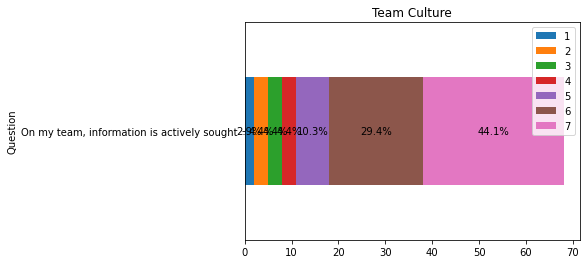

In [238]:
df.plot(
    x = 'Question',
    kind = 'barh',
    stacked = True,
    title = 'Team Culture',
    mark_right = True)

df_total = df['1'] + df['2'] + df['3'] + df['4'] + df['5'] + df['6'] + df['7']
df_rel = df[df.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], df[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', va = 'center', ha = 'center')

In [ ]:
# stopping here for this notebook, moving to jared3_full_chart